In [2]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from pytensor import tensor as pt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
data = pd.read_csv("../data/burke/data/input/GrowthClimateDataset.csv")

0.428484656999899


In [18]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [193]:
# model = pd.read_pickle('../models/burke-reproduction-mcmc-fixed-effects-grad-effects-missing-rows-imputed-deterministic-observed-original-dataset.pkl')
# model = pd.read_pickle('../models/burke-reproduction-mcmc-fixed-effects-grad-effects-missing-rows-imputed-country-specific-priors-1960-omitted.pkl')
model = pd.read_pickle('../models/burke-reproduction-mcmc-fixed-effects-grad-effects-missing-rows-omitted-deterministic-observed.pkl')
trace = model["trace"]
posterior = model["posterior"]
precip_scaler = model["precip_scaler"]
gdp_scaler = model["gdp_scaler"]
temp_scaler = model["temp_scaler"]

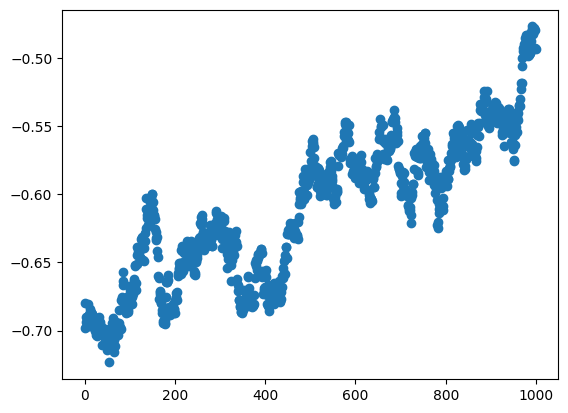

In [37]:
plt.scatter(list(range(4000)), posterior.posterior.temp_gdp_coef[0].data.flatten())

In [16]:
# temp_sum = az.summary(trace.posterior.temp_posterior_unobserved)
temp_sum = az.summary(trace.posterior.mixed_temp_prior)

/home/hayden_freedman/pymc_dev.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/hayden_freedman/pymc_dev.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/hayden_freedman/pymc_dev.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/hayden_freedman/pymc_dev.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/hayden_freedman/pymc_dev.venv/

In [15]:
precip_sum = az.summary(trace.posterior.precip_posterior_unobserved)

AttributeError: 'Dataset' object has no attribute 'precip_posterior_unobserved'

In [103]:
gdp_sum = az.summary(trace.posterior.gdp_posterior_unobserved)

In [10]:
# print(np.mean(temp_sum["sd"]))
# print(np.mean(precip_sum["sd"]))
print(np.mean(gdp_sum["sd"]))

0.07505427974947806
0.26560960334029227
2.0192916666666663


In [43]:
temp_scaler.inverse_transform(np.array([min(list(temp_sum["mean"]))]).reshape(-1,1))

array([[-6.59791264]])

In [49]:
gdp_sum

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
gdp_posterior_unobserved[0],-2.879,2.138,-6.661,0.213,0.905,0.734,6.0,30.0,1.69
gdp_posterior_unobserved[1],-2.755,2.004,-6.377,0.325,0.843,0.686,6.0,37.0,1.74
gdp_posterior_unobserved[2],-2.601,1.857,-5.687,0.143,0.780,0.649,6.0,22.0,1.73
gdp_posterior_unobserved[3],-2.362,1.925,-6.073,0.802,0.791,0.622,7.0,46.0,1.61
gdp_posterior_unobserved[4],-2.624,1.665,-5.219,-0.053,0.683,0.566,6.0,11.0,1.76
gdp_posterior_unobserved[5],-2.034,1.887,-5.502,0.780,0.799,0.654,7.0,19.0,1.64
gdp_posterior_unobserved[6],-2.137,1.627,-4.619,0.257,0.680,0.568,7.0,20.0,1.64
gdp_posterior_unobserved[7],-1.911,1.400,-4.039,0.417,0.522,0.428,7.0,39.0,1.51
gdp_posterior_unobserved[8],-1.739,1.216,-4.176,0.399,0.381,0.278,10.0,54.0,1.32
gdp_posterior_unobserved[9],-2.124,1.338,-4.025,0.048,0.493,0.412,8.0,59.0,1.43


In [195]:
max(list(trace.posterior.grad_effects[0][0].data))

26.2030782277428

In [47]:
list(gdp_sum["mean"]).index(min(list(gdp_sum["mean"])))

418

In [50]:
data = pd.read_csv("../data/burke/data/input/GrowthClimateDataset.csv")

In [59]:
missing_count = -1
for row in data.itertuples():
    if np.isnan(row.growthWDI):
        missing_count += 1
    if missing_count == 415:
        print(row)
        break

Pandas(Index=3991, iso='IRQ', year=2000, AgrGDP=2658000000.0, Pop=23801156.0, TotGDP=48710000000.0, gdpCAP_wdi=2046.6507, gdpCAPppp_wdi=12011.917, countryname='Iraq', isocode='IRQ', NonAgrGDP=46100000000.0, growthWDI=nan, AgrGDPgrowth=nan, AgrGDPgrowthCap=nan, TotGDPgrowth=nan, TotGDPgrowthCap=nan, NonAgrGDPgrowth=nan, NonAgrGDPgrowthCap=nan, firstyrWDIppp=2000.0, GDPpctile_WDIppp=66.0, firstyrWDI=2000.0, GDPpctile_WDI=42.0, continent='MENA', OilGDP=nan, oil=0.0, gdpCAPppp=3407.607, rgdpCAPgr=-0.0164108, fid=111.0, UDel_temp_popweight=22.24, UDel_precip_popweight=214.13, iso_id='IRQ', UDel_precip_popweight_2=45851.66, wdinomiss=13, time=40, time2=1600, _35=0, _36=0, _37=0, _38=0, _39=0, _40=0, _41=0, _42=0, _43=0, _44=0, _45=0, _46=0, _47=0, _48=0, _49=0, _50=0, _51=0, _52=0, _53=0, _54=0, _55=0, _56=0, _57=0, _58=0, _59=0, _60=0, _61=0, _62=0, _63=0, _64=0, _65=0, _66=0, _67=0, _68=0, _69=0, _70=0, _71=0, _72=0, _73=0, _74=0, _75=0, _76=0, _77=0, _78=0, _79=0, _80=0, _81=0, _82=0, _83

In [67]:
print(min(list(trace.posterior.year_fixed_effects[0][0])))
print(max(list(trace.posterior.year_fixed_effects[0][0])))

<xarray.DataArray 'year_fixed_effects' ()>
array(-1.44950517)
Coordinates:
    chain                     int64 0
    draw                      int64 0
    year_fixed_effects_dim_0  int64 188
<xarray.DataArray 'year_fixed_effects' ()>
array(0.43670123)
Coordinates:
    chain                     int64 0
    draw                      int64 0
    year_fixed_effects_dim_0  int64 2


In [12]:
trace.posterior.gdp_prior[0][0][187]

<xarray.DataArray 'gdp_prior' ()>
array(-2.25451646)
Coordinates:
    chain            int64 0
    draw             int64 0
    gdp_prior_dim_0  int64 187

In [13]:
trace.posterior.gdp_posterior_unobserved[0][0][25]

<xarray.DataArray 'gdp_posterior_unobserved' ()>
array(-102.50850579)
Coordinates:
    chain                           int64 0
    draw                            int64 0
    gdp_posterior_unobserved_dim_0  int64 25

In [27]:
fig = az.plot_ppc(posterior,var_names=["temp_posterior_observed","precip_posterior_observed","gdp_posterior_observed"]).ravel()[0].figure
fig.show()

KeyError: 'var names: "[\'temp_posterior_unobserved\'] are not present" in dataset'

/tmp/ipykernel_10873/1883471754.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


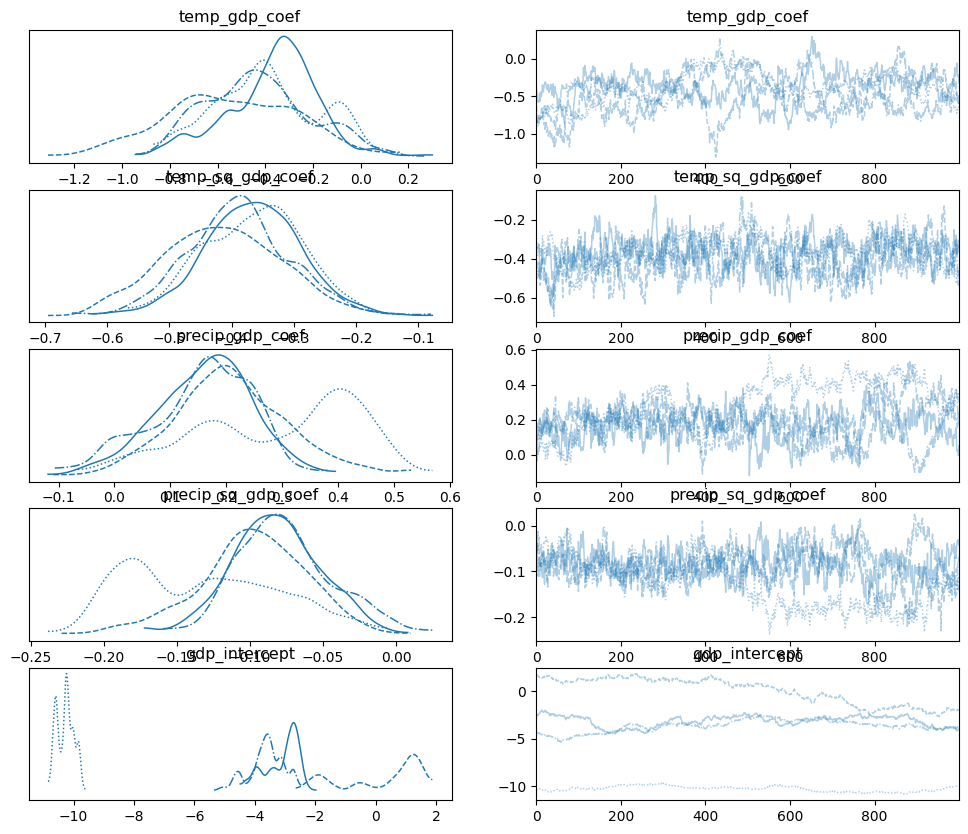

In [18]:
fig = az.plot_trace(trace, var_names=["temp_gdp_coef","temp_sq_gdp_coef","precip_gdp_coef","precip_sq_gdp_coef","gdp_intercept"]).ravel()[0].figure
fig.show()